### Final Project: Remaining puzzle pieces counter
### SCC5830 - Digital Image Processing
### Nome: Igor Martinelli   
### NUSP: 9006336
### 2020/1

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

import os
import re
import imageio
import numpy as np
import matplotlib.pyplot as plt
from scripts.puzzle import PuzzleDetector

## An example of input.

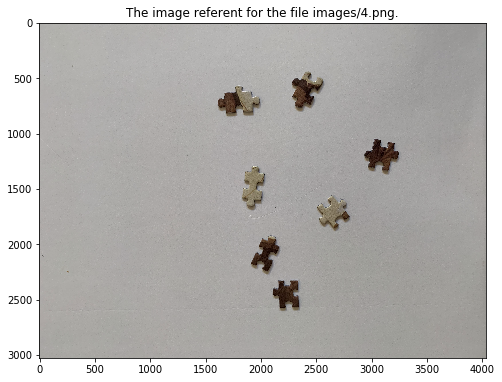

In [3]:
self = PuzzleDetector(filename='images/4.png')
self.plot('img')

## Converting the image to gray to find the masks.

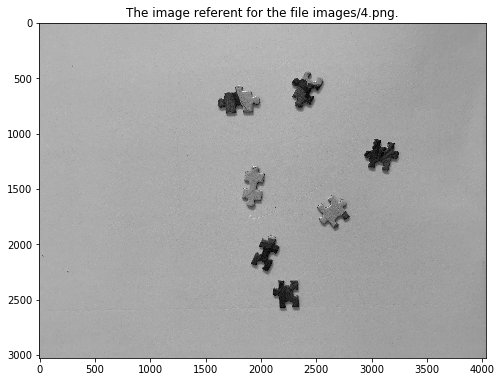

In [4]:
self.rgb2gray()
self.plot('gray')

## Showing the results of Canny in the natural image which is not so efective.

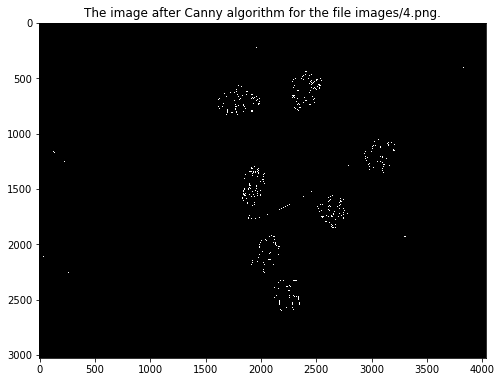

In [5]:
self.canny_edge_detection()
self.plot('canny')

## Trying to apply the threshold filter in the natural image.

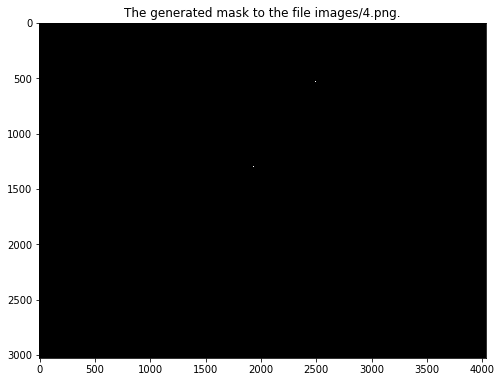

In [6]:
self.image_segmentation()
self.plot('mask')

## The threshold filter executed in the image that was processed by the API.

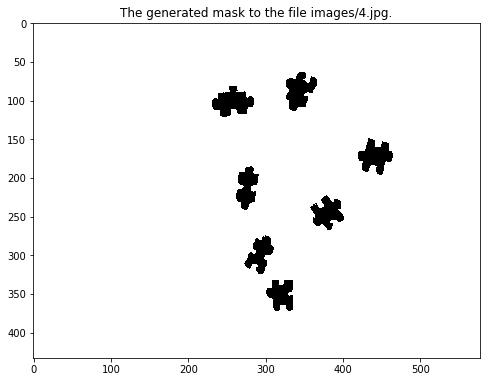

In [7]:
self = PuzzleDetector(filename='images/4.jpg')
self.rgb2gray()
self.image_segmentation()
self.plot('mask')

## Splitting the processed image using the masks obtained and counting how many pieces are in the image.

There are 7 pieces of the puzzle in this image.


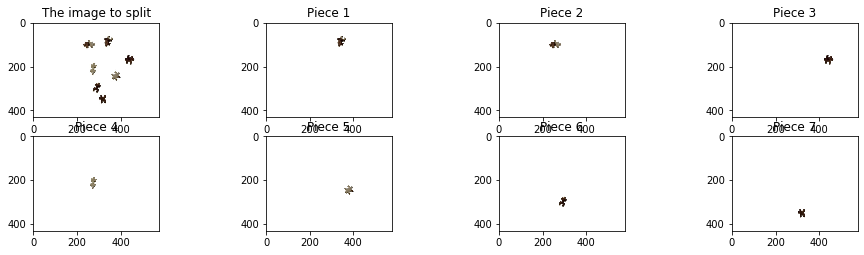

In [8]:
self.pieces_detection()
self.plot('split')

## Executing the algorithm to all the test cases proposed.

In [9]:
files = [i for i in os.listdir('images/') if re.search('^\d.jpg$', i)]
files.sort()

There are 1 pieces of the puzzle in this image.


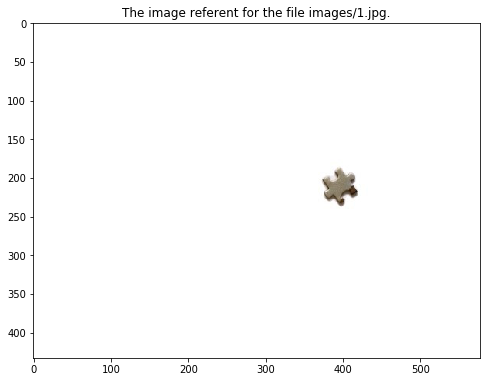

There are 2 pieces of the puzzle in this image.


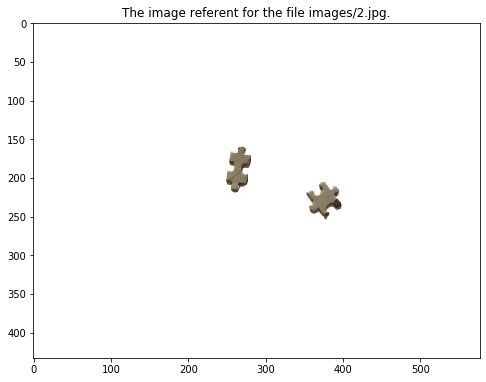

There are 4 pieces of the puzzle in this image.


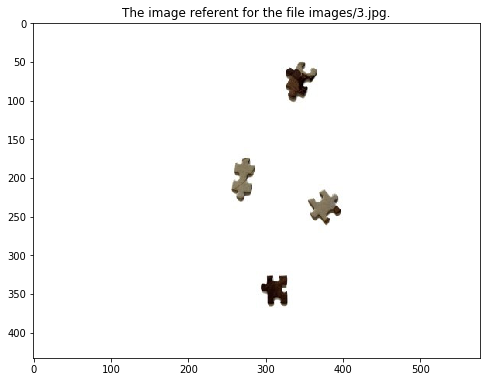

There are 7 pieces of the puzzle in this image.


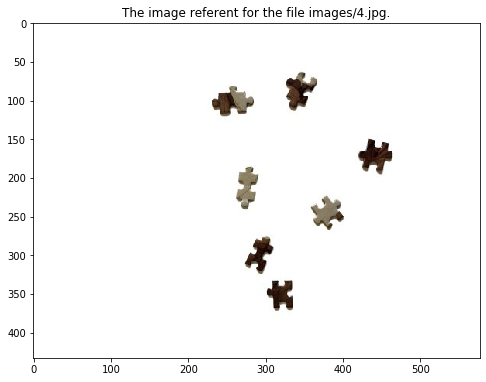

There are 10 pieces of the puzzle in this image.


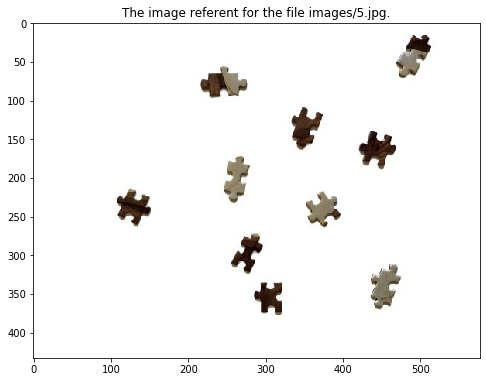

There are 12 pieces of the puzzle in this image.


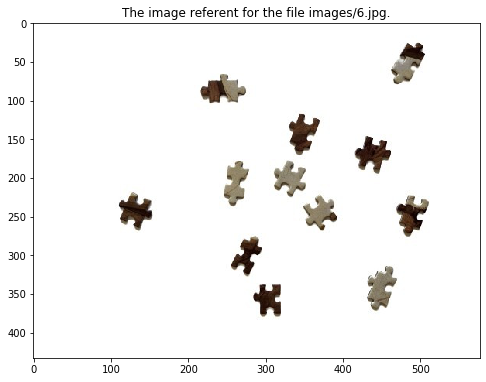

There are 13 pieces of the puzzle in this image.


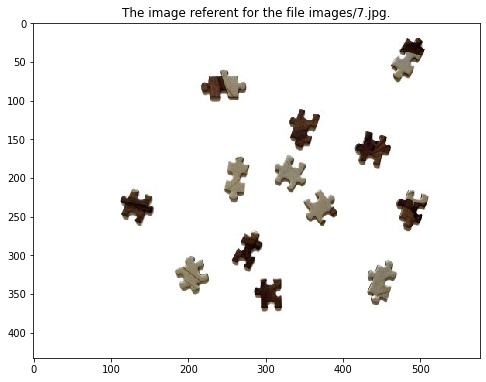

In [10]:
for file in files:
    self = PuzzleDetector(filename='images/'+file)
    self.rgb2gray()
    self.image_segmentation()
    self.pieces_detection()
    self.plot('img')

## Trying to find the piece that are most similar to another.

In [11]:
piece = PuzzleDetector(filename='images/1.jpg')
piece.rgb2gray()
piece.image_segmentation()
piece.pieces_detection()
piece_descriptor = piece.generate_all_descriptors()

There are 1 pieces of the puzzle in this image.
The descriptors of the 1 images were generated


There are 13 pieces of the puzzle in this image.
The descriptors of the 13 images were generated
The most similar piece in the presented pieces is piece 8


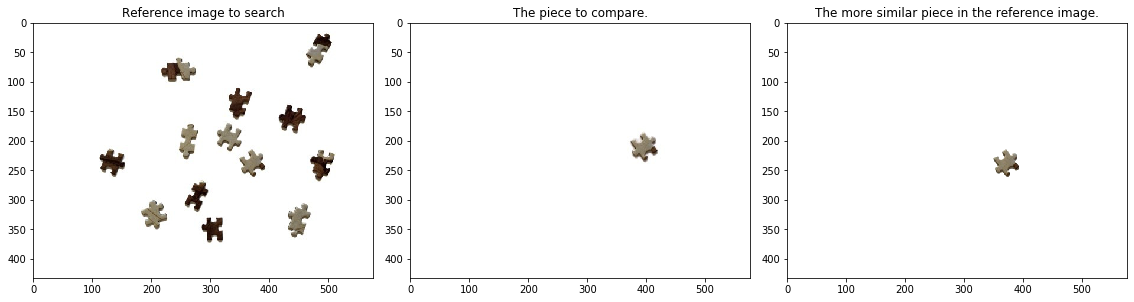

In [12]:
pieces = PuzzleDetector(filename='images/7.jpg')
pieces.rgb2gray()
pieces.image_segmentation()
pieces.pieces_detection()
descriptors = pieces.generate_all_descriptors()

pieces.detect_equal_piece(piece_descriptor, descriptors, piece)

There are 10 pieces of the puzzle in this image.
The descriptors of the 10 images were generated
The most similar piece in the presented pieces is piece 7


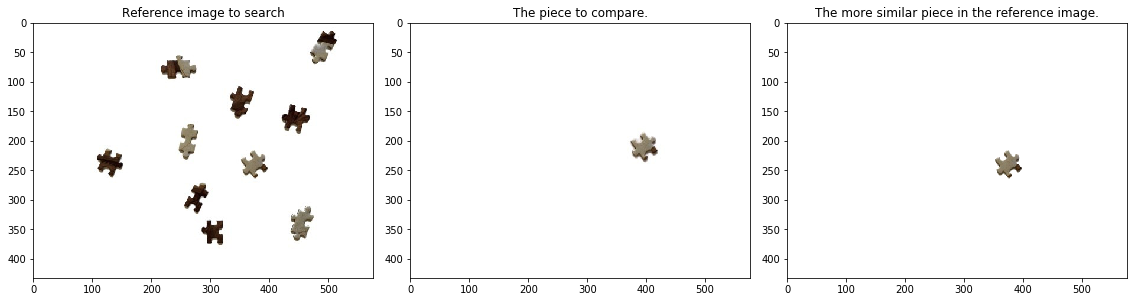

In [13]:
pieces = PuzzleDetector(filename='images/5.jpg')
pieces.rgb2gray()
pieces.image_segmentation()
pieces.pieces_detection()
descriptors = pieces.generate_all_descriptors()

pieces.detect_equal_piece(piece_descriptor, descriptors, piece)